# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [36]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

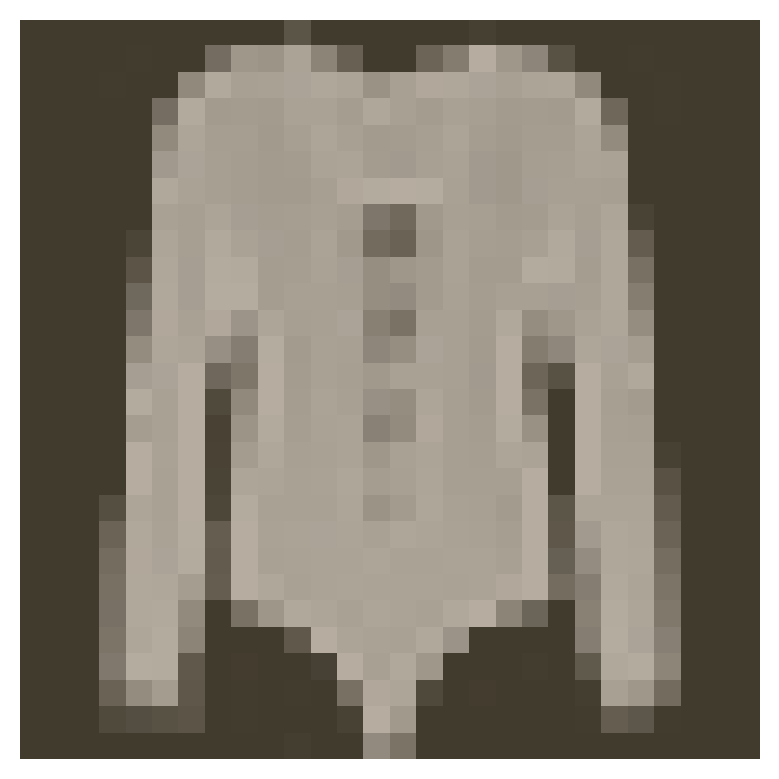

In [37]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [ ]:
# TODO: Define your network architecture here
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        # x.shape[0] give us our batch size of 64
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [ ]:
# TODO: Create the network, define the criterion and optimizer
model = Classifier()

# define the loss
# since using log softmax, use NLLLoss() - negative log likelihood loss
criterion = nn.NLLLoss()

# stochastic gradient descent, used for backpropagation (training)
# could use the Adam optimizer - same as SGD, but uses momentum which speeds up the fitting process
optimizer = optim.SGD(model.parameters(), lr=0.003)



In [40]:
# TODO: Train the network here
epochs = 1
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        log_ps = model(images)
        
        # Flatten MNIST images into a 784 long vector
        # take first arg (784) and multiply it by all the other args (1) 
        images = images.view(images.shape[0], -1)

        # this won't show anything
        # print(f'this is images: {images}\n')

        # this should be 64X784
        # print(f'this is its shape: {images.shape}')
    
        # TODO: Training pass

        # zero out the optimizer since it will sum with each run
        optimizer.zero_grad()
        
        # load the images into the model
        output = model(images)

        # determine the loss by using the criteria we've set (NLLLoss)
        # subtract the output from the labels to get the loss
        loss = criterion(output, labels)

        # use this loss to back propagate
        loss.backward()
        
        # use gradient descent 
        optimizer.step()
        
        running_loss += loss.item()
    else:

        # after each loop, print the loss for each run - should decrease
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 2.127467007271008


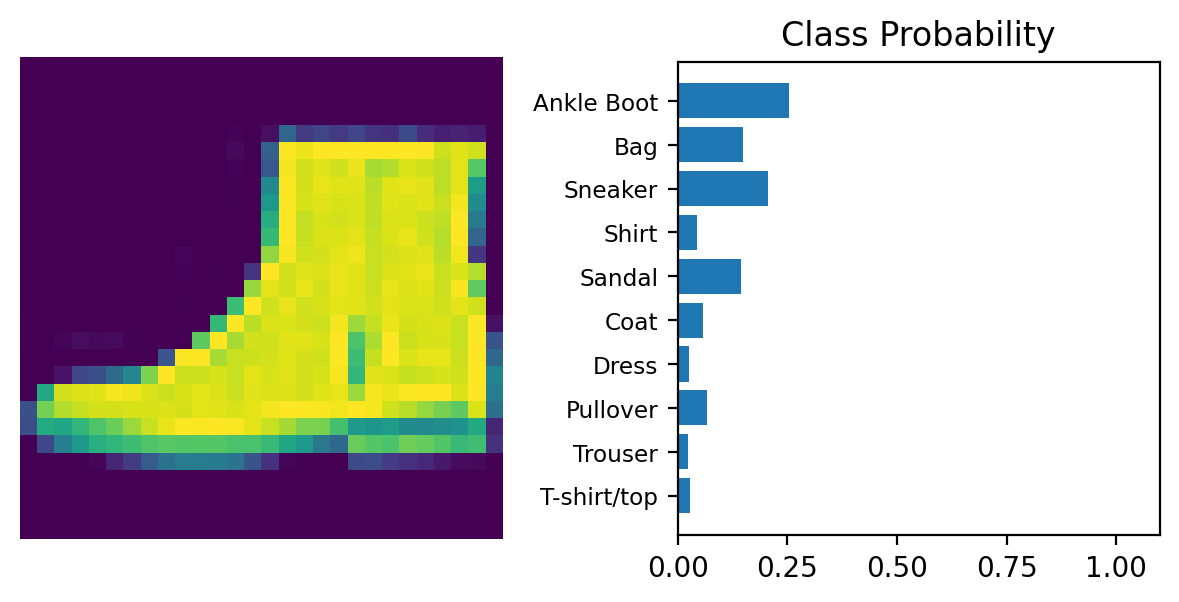

In [41]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')